### Predicting Coronavirus Outbreak and Recovering Rate with FB Prophet
+ Lots of influencing factors hence prediction can be wrong
  - Less Data
  - Presence of Effective Treatment and Vaccine can influence prediction

#### Installation
+ pip install fbprophet

#### Data Source
+ https://github.com/CSSEGISandData/COVID-19
+ https://raw.githubusercontent.com/Jcharis/DataScienceTools/master/Data_analysis_of_Coronavirus_Outbreak_with_Python/coronavirus_data_clean.csv

In [1]:
#!pip install cython

In [2]:
#!pip install fbprophet httpstan

In [3]:
#!pip install pandas

In [1]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_cases_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
death_cases_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [2]:
def get_n_melt_data(data_url,case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={"variable":"Date","value":case_type},inplace=True)
    return melted_df

def merge_data(confirm_df,recovered_df,deaths_df):
	new_df = confirm_df.join(recovered_df['Recovered']).join(deaths_df['Deaths'])
	return new_df

In [3]:
# Load EDA pkg
import pandas as pd

In [4]:
confirm_df = get_n_melt_data(confirmed_cases_url,"Confirmed")
recovered_df = get_n_melt_data(recovered_cases_url,"Recovered")
deaths_df = get_n_melt_data(death_cases_url,"Deaths")

In [5]:
confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
179113,NaN,Vietnam,14.058324,108.277199,10/24/21,888940
179114,NaN,West Bank and Gaza,31.952200,35.233200,10/24/21,450310
179115,NaN,Yemen,15.552727,48.516388,10/24/21,9678
179116,NaN,Zambia,-13.133897,27.849332,10/24/21,209634
179117,NaN,Zimbabwe,-19.015438,29.154857,10/24/21,132651


In [6]:
df = merge_data(confirm_df,recovered_df,deaths_df)

In [7]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0.0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0


In [8]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
179113,NaN,Vietnam,14.058324,108.277199,10/24/21,888940,NaN,21673
179114,NaN,West Bank and Gaza,31.952200,35.233200,10/24/21,450310,NaN,4611
179115,NaN,Yemen,15.552727,48.516388,10/24/21,9678,NaN,1840
179116,NaN,Zambia,-13.133897,27.849332,10/24/21,209634,NaN,3659
179117,NaN,Zimbabwe,-19.015438,29.154857,10/24/21,132651,NaN,4669


In [9]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [10]:
df_per_day = df.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum()

In [11]:
df_per_day

,Confirmed,Recovered,Deaths
Date,,,
1/1/21,84204284,55298166.0,1890582
1/10/21,90432846,66748238.0,1999098
1/11/21,91049721,57217361.0,2009141
1/12/21,91746984,57440194.0,2026272
1/13/21,92494681,61313024.0,2043163
...,...,...,...
9/7/21,222046094,0.0,4587287
9/8/20,27611503,26082313.0,944373
9/8/21,222676835,0.0,4597392


In [12]:
df_per_day.describe()

,Confirmed,Recovered,Deaths
count,6.420000e+02,6.420000e+02,6.420000e+02
mean,8.843543e+07,3.659105e+07,2.005140e+06
std,8.022115e+07,4.284737e+07,1.609909e+06
min,5.570000e+02,0.000000e+00,1.700000e+01
25%,1.051316e+07,7.698150e+04,5.373305e+05
50%,6.809948e+07,1.763232e+07,1.608475e+06
75%,1.635348e+08,6.484567e+07,3.501684e+06
max,2.436714e+08,1.729492e+08,4.948410e+06


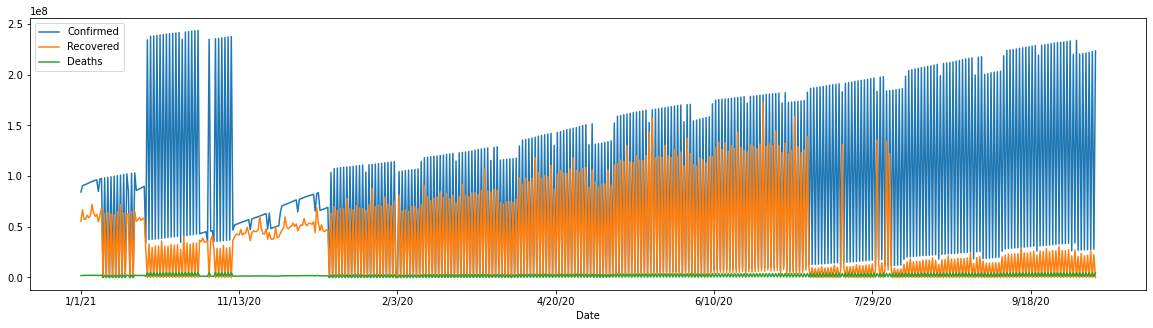

In [13]:
df_per_day.plot(kind='line',figsize=(20,5))

In [14]:
!pip install fbprophet

In [15]:
# Time Series Forecasting
import fbprophet


Importing plotly failed. Interactive plots will not work.


In [17]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [34]:
# Model Initialize
from fbprophet import Prophet
m = Prophet()

In [35]:
m.add_seasonality(name="monthly",period=30.5,fourier_order=5)

In [36]:
# Split Dataset
df_per_day

,Confirmed,Recovered,Deaths
Date,,,
1/1/21,84204284,55298166.0,1890582
1/10/21,90432846,66748238.0,1999098
1/11/21,91049721,57217361.0,2009141
1/12/21,91746984,57440194.0,2026272
1/13/21,92494681,61313024.0,2043163
...,...,...,...
9/7/21,222046094,0.0,4587287
9/8/20,27611503,26082313.0,944373
9/8/21,222676835,0.0,4597392


In [37]:
global_cases = df_per_day.reset_index()

In [38]:
global_cases.head()

,Date,Confirmed,Recovered,Deaths
0,1/1/21,84204284,55298166.0,1890582
1,1/10/21,90432846,66748238.0,1999098
2,1/11/21,91049721,57217361.0,2009141
3,1/12/21,91746984,57440194.0,2026272
4,1/13/21,92494681,61313024.0,2043163


In [39]:
confirmed_cases = global_cases[["Date","Confirmed"]]
recovered_cases = global_cases[["Date","Recovered"]]

In [40]:
confirmed_cases.shape

(642, 2)

In [41]:
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

C:\Users\abhin\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [81]:
train = confirmed_cases[:600]
test = confirmed_cases[600:]

In [82]:
train.head()

,ds,y
0,1/1/21,84204284
1,1/10/21,90432846
2,1/11/21,91049721
3,1/12/21,91746984
4,1/13/21,92494681


In [83]:
train

,ds,y
0,1/1/21,84204284
1,1/10/21,90432846
2,1/11/21,91049721
3,1/12/21,91746984
4,1/13/21,92494681
...,...,...
595,9/15/21,226491083
596,9/16/20,29900930
597,9/16/21,227065902
598,9/17/20,30215729


In [84]:
test.head()

,ds,y
600,9/18/20,30541692
601,9/18/21,228192357
602,9/19/20,30834298
603,9/19/21,228549852
604,9/2/20,26056416


In [44]:
# Fit Model
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
# Future Date
future_dates = m.make_future_dataframe(periods=42)

In [46]:
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
637,2021-12-01
638,2021-12-02
639,2021-12-03
640,2021-12-04


In [87]:
test

,ds,y,dates
600,9/18/20,30541692,2020-09-18
601,9/18/21,228192357,2021-09-18
602,9/19/20,30834298,2020-09-19
603,9/19/21,228549852,2021-09-19
604,9/2/20,26056416,2020-09-02
605,9/2/21,219238454,2021-09-02
606,9/20/20,31086923,2020-09-20
607,9/20/21,229090633,2021-09-20
608,9/21/20,31361668,2020-09-21
609,9/21/21,229559016,2021-09-21


In [89]:
test['ds'] = pd.to_datetime(test['ds'])

<ipython-input-89-ba1d468fb1ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ds'] = pd.to_datetime(test['ds'])


In [92]:
# Prediction
prediction =  m.predict(test)

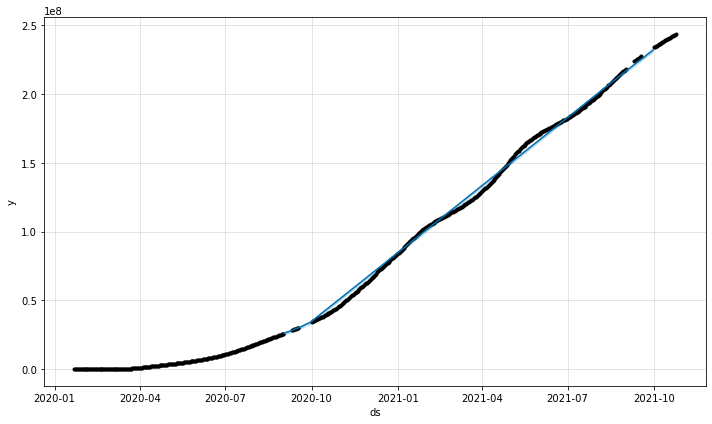

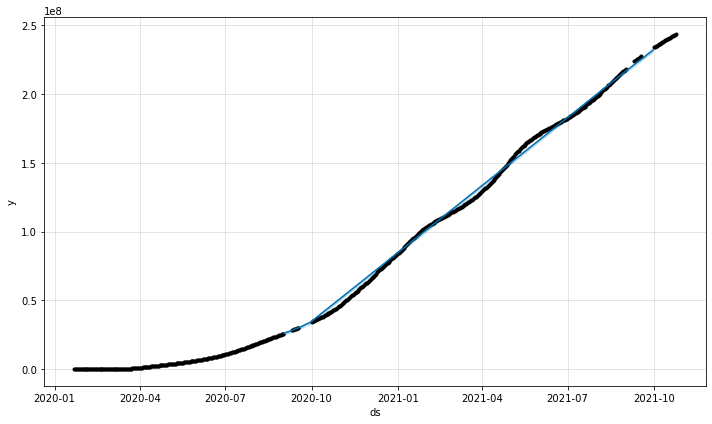

In [93]:
# Plot Prediction
m.plot(prediction)

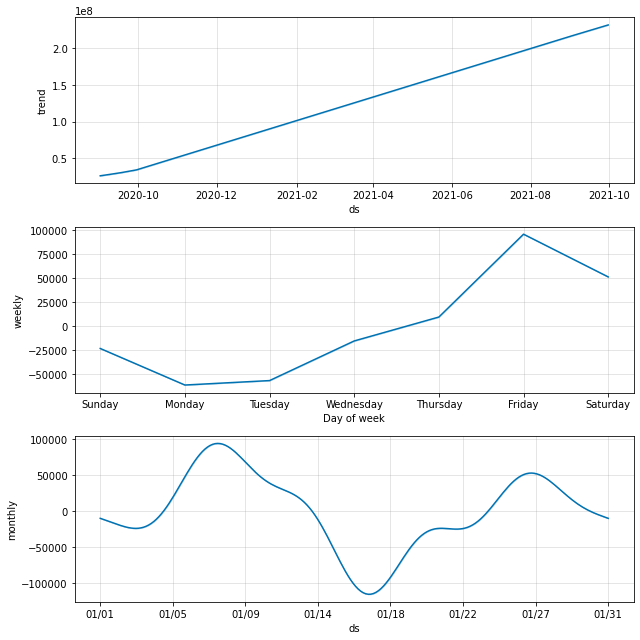

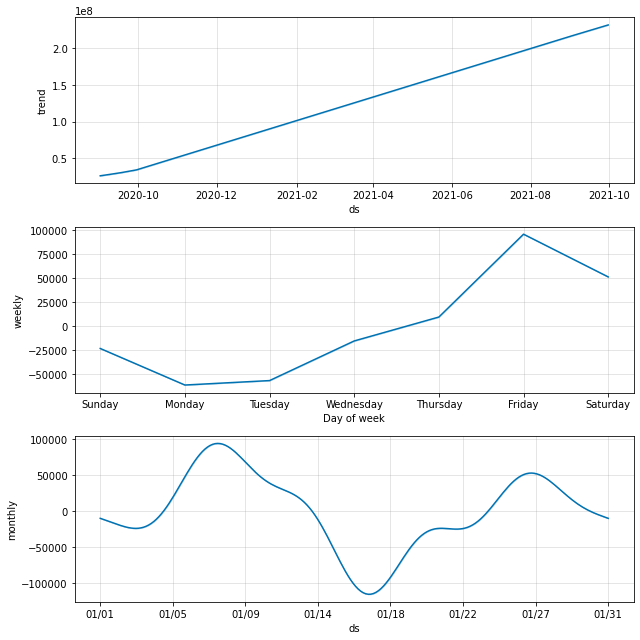

In [94]:
m.plot_components(prediction)

In [50]:
test

,ds,y
600,9/18/20,30541692
601,9/18/21,228192357
602,9/19/20,30834298
603,9/19/21,228549852
604,9/2/20,26056416
605,9/2/21,219238454
606,9/20/20,31086923
607,9/20/21,229090633
608,9/21/20,31361668
609,9/21/21,229559016


In [85]:
test['dates'] = pd.to_datetime(test['ds'])

<ipython-input-85-a3eb9f631ca6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['dates'] = pd.to_datetime(test['ds'])


In [80]:
test

dates
2020-09-18     30541692
2021-09-18    228192357
2020-09-19     30834298
2021-09-19    228549852
2020-09-02     26056416
2021-09-02    219238454
2020-09-20     31086923
2021-09-20    229090633
2020-09-21     31361668
2021-09-21    229559016
2020-09-22     31646410
2021-09-22    230096150
2020-09-23     31922488
2021-09-23    230606918
2020-09-24     32276011
2021-09-24    231154714
2020-09-25     32607077
2021-09-25    231518210
2020-09-26     32896010
2021-09-26    231849201
2020-09-27     33147911
2021-09-27    232337207
2020-09-28     33402277
2021-09-28    232784298
2020-09-29     33685207
2021-09-29    233286558
2020-09-03     26337999
2021-09-03    219955598
2020-09-30     34011272
2021-09-30    233771598
2020-09-04     26652306
2021-09-04    220444440
2020-09-05     26922626
2021-09-05    220871541
2020-09-06     27152912
2021-09-06    221309143
2020-09-07     27371041
2021-09-07    222046094
2020-09-08     27611503
2021-09-08    222676835
2020-09-09     27896907
2021-09-09

In [53]:
test = test.set_index("dates")
test

,ds,y
dates,,
2020-09-18,9/18/20,30541692
2021-09-18,9/18/21,228192357
2020-09-19,9/19/20,30834298
2021-09-19,9/19/21,228549852
2020-09-02,9/2/20,26056416
2021-09-02,9/2/21,219238454
2020-09-20,9/20/20,31086923
2021-09-20,9/20/21,229090633
2020-09-21,9/21/20,31361668


In [54]:
test = test['y']

In [55]:
import matplotlib.pyplot as plt


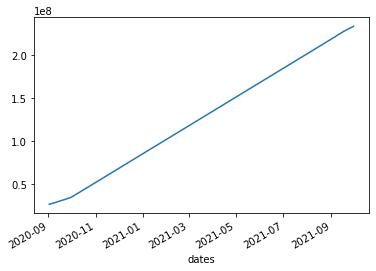

In [56]:
test.plot()

In [57]:
# Find Point/Dates For Change
from fbprophet.plot import add_changepoints_to_plot

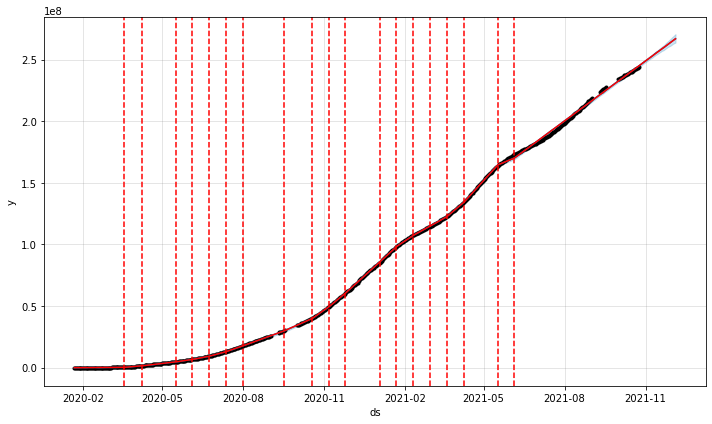

In [58]:
fig = m.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),m,prediction)

In [95]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='600 days', period='30.5 days', horizon = '41 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-09-13 00:00:00 and 2021-09-13 00:00:00


In [60]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,1.765286e+13,4.201530e+06,4.201279e+06,0.018573,0.018573,0.0
1,3 days,1.834451e+13,4.283049e+06,4.282901e+06,0.018886,0.018886,0.0
2,4 days,1.847558e+13,4.298323e+06,4.298275e+06,0.018905,0.018905,0.0
3,18 days,1.703413e+13,4.127242e+06,4.124385e+06,0.017869,0.017869,0.0
4,19 days,1.546400e+13,3.932430e+06,3.932240e+06,0.016770,0.016770,0.0


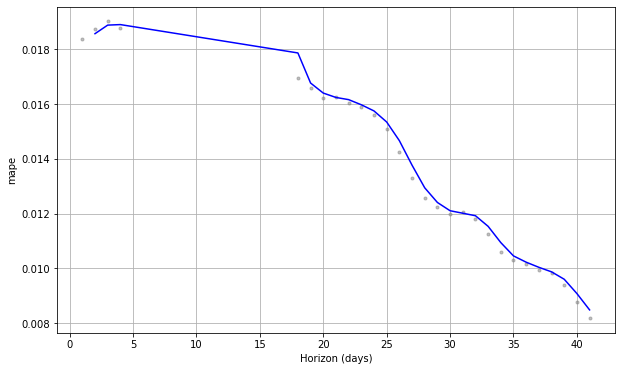

In [96]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [64]:
test

dates
2020-09-18     30541692
2021-09-18    228192357
2020-09-19     30834298
2021-09-19    228549852
2020-09-02     26056416
2021-09-02    219238454
2020-09-20     31086923
2021-09-20    229090633
2020-09-21     31361668
2021-09-21    229559016
2020-09-22     31646410
2021-09-22    230096150
2020-09-23     31922488
2021-09-23    230606918
2020-09-24     32276011
2021-09-24    231154714
2020-09-25     32607077
2021-09-25    231518210
2020-09-26     32896010
2021-09-26    231849201
2020-09-27     33147911
2021-09-27    232337207
2020-09-28     33402277
2021-09-28    232784298
2020-09-29     33685207
2021-09-29    233286558
2020-09-03     26337999
2021-09-03    219955598
2020-09-30     34011272
2021-09-30    233771598
2020-09-04     26652306
2021-09-04    220444440
2020-09-05     26922626
2021-09-05    220871541
2020-09-06     27152912
2021-09-06    221309143
2020-09-07     27371041
2021-09-07    222046094
2020-09-08     27611503
2021-09-08    222676835
2020-09-09     27896907
2021-09-09